<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/fraud_transaction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Description
This dataset is designed to help data scientists and machine learning enthusiasts develop robust fraud detection models. It contains realistic synthetic transaction data, including user information, transaction types, risk scores, and more, making it ideal for binary classification tasks with models like XGBoost and LightGBM.
This data was obtained from kaggle:https://www.kaggle.com/datasets/samayashar/fraud-detection-transactions-dataset/data

📌 Key Features
21 features capturing various aspects of a financial transaction
Realistic structure with numerical, categorical, and temporal data
Binary fraud labels (0 = Not Fraud, 1 = Fraud)
Designed for high accuracy with XGBoost and other ML models
Useful for anomaly detection, risk analysis, and security research

In [88]:
#Import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [89]:
from google.colab import files
uploaded = files.upload()

Saving fraud_transaction_detection_dataset.xlsx to fraud_transaction_detection_dataset (2).xlsx


In [90]:
import pandas as pd
df = pd.read_excel("fraud_transaction_detection_dataset.xlsx")
df.head()

,transaction_id,user_id,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,...,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,fraud_label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,19.75,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   transaction_id                50000 non-null  object        
 1   user_id                       50000 non-null  object        
 2   transaction_amount            50000 non-null  object        
 3   transaction_type              50000 non-null  object        
 4   timestamp                     50000 non-null  datetime64[ns]
 5   account_balance               50000 non-null  float64       
 6   device_type                   50000 non-null  object        
 7   location                      50000 non-null  object        
 8   merchant_category             50000 non-null  object        
 9   ip_address_flag               50000 non-null  int64         
 10  previous_fraudulent_activity  50000 non-null  int64         
 11  daily_transaction_count     

In [92]:
import pandas as pd
df = pd.read_excel("fraud_transaction_detection_dataset.xlsx")

# Convert columns to float, handling errors
df["transaction_amount"] = pd.to_numeric(df["transaction_amount"], errors="coerce")
df["avg_transaction_amount_7d"] = pd.to_numeric(df["avg_transaction_amount_7d"], errors="coerce")
df["transaction_distance"] = pd.to_numeric(df["transaction_distance"], errors="coerce")
df.dtypes

,0
transaction_id,object
user_id,object
transaction_amount,float64
transaction_type,object
timestamp,datetime64[ns]
account_balance,float64
device_type,object
location,object
merchant_category,object
ip_address_flag,int64


In [93]:
df.isnull().sum()

,0
transaction_id,0
user_id,0
transaction_amount,7
transaction_type,0
timestamp,0
account_balance,0
device_type,0
location,0
merchant_category,0
ip_address_flag,0


In [94]:
df.dropna(inplace=True)
df.shape

(49155, 21)

##Data Visualization

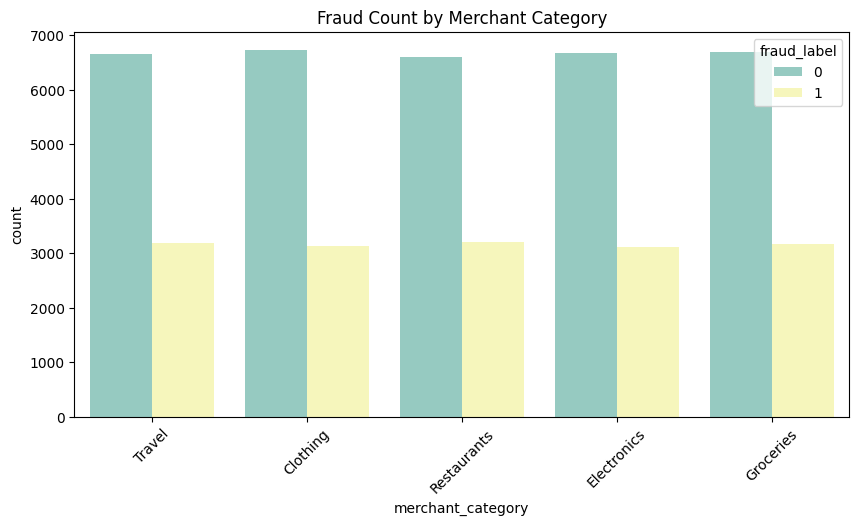

In [110]:
##Fraud count by the merchant category
plt.figure(figsize=(10,5))
sns.countplot(x='merchant_category', hue='fraud_label', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.title("Fraud Count by Merchant Category")
plt.show()

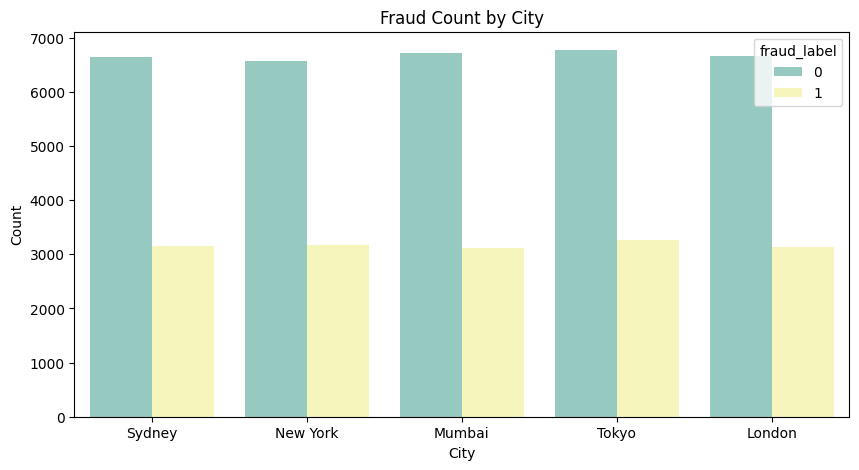

In [116]:
##Distribution of fraud count by city
plt.figure(figsize=(10,5))
sns.countplot(x=df['location'], hue=df['fraud_label'], palette='Set3')
plt.title("Fraud Count by City")
plt.ylabel("Count")
plt.xlabel("City")
plt.show()

In [95]:
df = df.drop(columns=['transaction_id', 'user_id', 'timestamp'],axis=1)

In [96]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('fraud_label')

print('Categorical Columns:', categorical_columns)
print('Numerical Columns:', numerical_columns)

Categorical Columns: ['transaction_type', 'device_type', 'location', 'merchant_category', 'card_type', 'authentication_method']
Numerical Columns: ['transaction_amount', 'account_balance', 'ip_address_flag', 'previous_fraudulent_activity', 'daily_transaction_count', 'avg_transaction_amount_7d', 'failed_transaction_count_7d', 'card_age', 'transaction_distance', 'risk_score', 'is_weekend']


In [121]:
# Get unique values for each of the specified columns
unique_values = df[['transaction_type', 'device_type', 'location', 'merchant_category', 'card_type', 'authentication_method']].apply(pd.unique)
unique_values= pd.DataFrame(unique_values)
# Print or further process the unique values
print(unique_values)

                                                                       0
transaction_type            [POS, Bank Transfer, Online, ATM Withdrawal]
device_type                                     [Laptop, Mobile, Tablet]
location                       [Sydney, New York, Mumbai, Tokyo, London]
merchant_category      [Travel, Clothing, Restaurants, Electronics, G...
card_type                             [Amex, Mastercard, Visa, Discover]
authentication_method                    [Biometric, Password, OTP, PIN]


In [97]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False to return an array instead of a sparse matrix
encoded_categorical_data = encoder.fit_transform(df[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_columns))
# Use get_feature_names_out to align with the encoded data

print('Encoded Categorical Data Head:')
print(encoded_categorical_df.head())

Encoded Categorical Data Head:
   transaction_type_ATM Withdrawal  transaction_type_Bank Transfer  \
0                              0.0                             0.0   
1                              0.0                             1.0   
2                              0.0                             0.0   
3                              1.0                             0.0   
4                              0.0                             0.0   

   transaction_type_Online  transaction_type_POS  device_type_Laptop  \
0                      0.0                   1.0                 1.0   
1                      0.0                   0.0                 0.0   
2                      1.0                   0.0                 0.0   
3                      0.0                   0.0                 0.0   
4                      0.0                   1.0                 0.0   

   device_type_Mobile  device_type_Tablet  location_London  location_Mumbai  \
0                 0.0               

In [98]:
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)
print('Scaled Numerical Data Head:')
print(scaled_numerical_df.head())

Scaled Numerical Data Head:
   transaction_amount  account_balance  ip_address_flag  \
0           -0.625925         1.492249        -0.229526   
1           -0.831935         0.884063        -0.229526   
2           -0.737257        -1.694208        -0.229526   
3            1.579436         0.921691        -0.229526   
4           -0.713407         1.462392        -0.229526   

   previous_fraudulent_activity  daily_transaction_count  \
0                     -0.330519                -0.119849   
1                     -0.330519                 1.364953   
2                     -0.330519                 1.612420   
3                     -0.330519                 0.127618   
4                      3.025540                 1.612420   

   avg_transaction_amount_7d  failed_transaction_count_7d  card_age  \
0                   1.283606                     0.703580 -0.796379   
1                   1.578288                     1.410612  0.958007   
2                  -1.493550               

####Feature Engineering

In [99]:
##joining scaled numerical to encoded categorical into a dataframe
preprocessed_df = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)
preprocessed_df['fraud_label'] = df['fraud_label'].values
preprocessed_df.head()

,transaction_amount,account_balance,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_age,transaction_distance,risk_score,...,merchant_category_Travel,card_type_Amex,card_type_Discover,card_type_Mastercard,card_type_Visa,authentication_method_Biometric,authentication_method_OTP,authentication_method_PIN,authentication_method_Password,fraud_label
0,-0.625925,1.492249,-0.229526,-0.330519,-0.119849,1.283606,0.703580,-0.796379,-1.130158,1.208795,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.831935,0.884063,-0.229526,-0.330519,1.364953,1.578288,1.410612,0.958007,-0.211433,-1.409897,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,-0.737257,-1.694208,-0.229526,-0.330519,1.612420,-1.493550,1.410612,1.537970,-0.416077,1.176127,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
3,1.579436,0.921691,-0.229526,-0.330519,0.127618,-0.544451,1.410612,-0.636890,-0.831831,1.014522,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,-0.713407,1.462392,-0.229526,3.025540,1.612420,0.503091,1.410612,0.291050,-1.071834,-0.415941,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


In [100]:
##Combine Processed Data
##Model Training & Evaluation
x = preprocessed_df.drop(columns=['fraud_label'])
y = preprocessed_df['fraud_label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((34408, 36), (34408,), (14747, 36), (14747,))

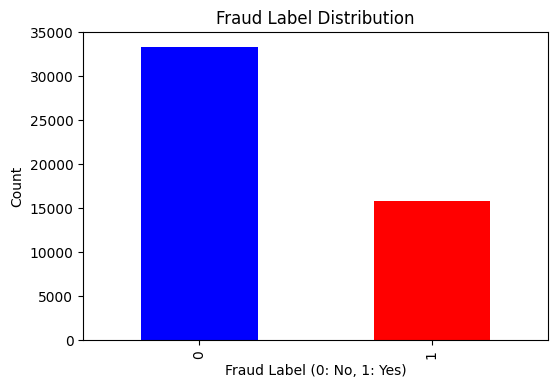

In [101]:
##Find the distribution of target variables
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Fraud Label Distribution')
plt.xlabel('Fraud Label (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [102]:
##Running through the various classification models
classification_models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Extra Trees': RandomForestClassifier(n_estimators=200),
    'XGBoost': GradientBoostingClassifier(n_estimators=200),
    'Bagging Classifier': RandomForestClassifier(n_estimators=100, bootstrap=True),
    'CatBoost': GradientBoostingClassifier(n_estimators=300),
    'LightGBM': GradientBoostingClassifier(n_estimators=400),
    'Logistic Regression': LogisticRegression(random_state=10,solver='lbfgs')
}

In [103]:
##Training,Evaluation & model Optimization
model_performance = []

for model_name, model in classification_models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  y_pred_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, 'predict_proba') else None
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
  model_performance.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC-ROC': auc})

performance_df = pd.DataFrame(model_performance)
print(performance_df)

                     Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0            Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
1            Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
2        Gradient Boosting  1.000000   1.000000  1.000000  1.000000  1.000000
3                 AdaBoost  1.000000   1.000000  1.000000  1.000000  1.000000
4   Support Vector Machine  0.982234   0.968828  0.976180  0.972491  0.998889
5      K-Nearest Neighbors  0.828847   0.805617  0.616779  0.698663  0.899131
6              Naive Bayes  0.888994   0.848709  0.797007  0.822046  0.948608
7              Extra Trees  1.000000   1.000000  1.000000  1.000000  1.000000
8                  XGBoost  1.000000   1.000000  1.000000  1.000000  1.000000
9       Bagging Classifier  1.000000   1.000000  1.000000  1.000000  1.000000
10                CatBoost  1.000000   1.000000  1.000000  1.000000  1.000000
11                LightGBM  1.000000   1.000000  1.000000  1.000

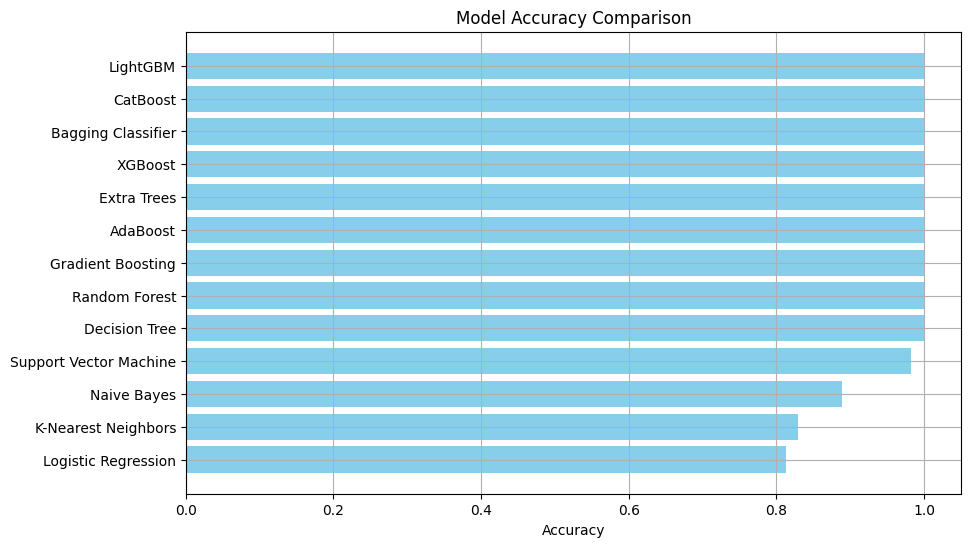

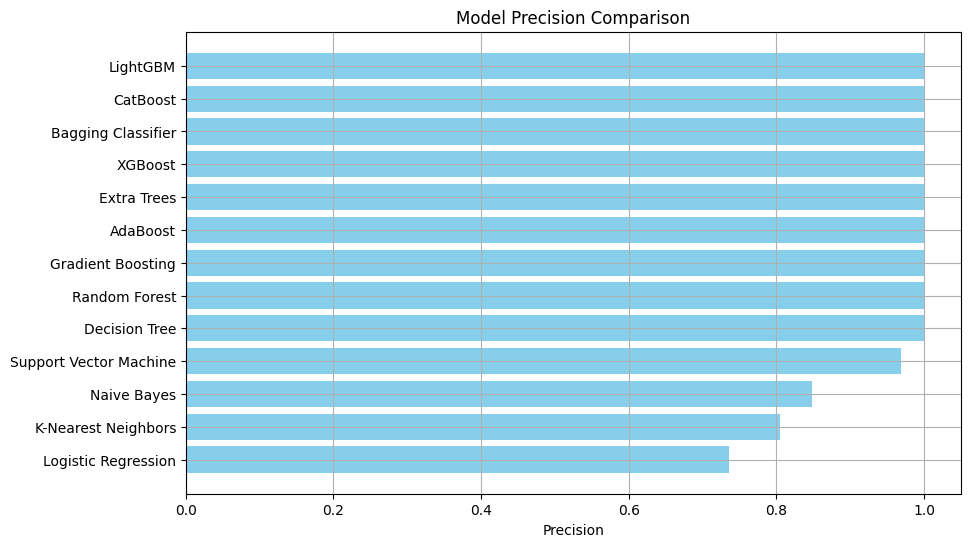

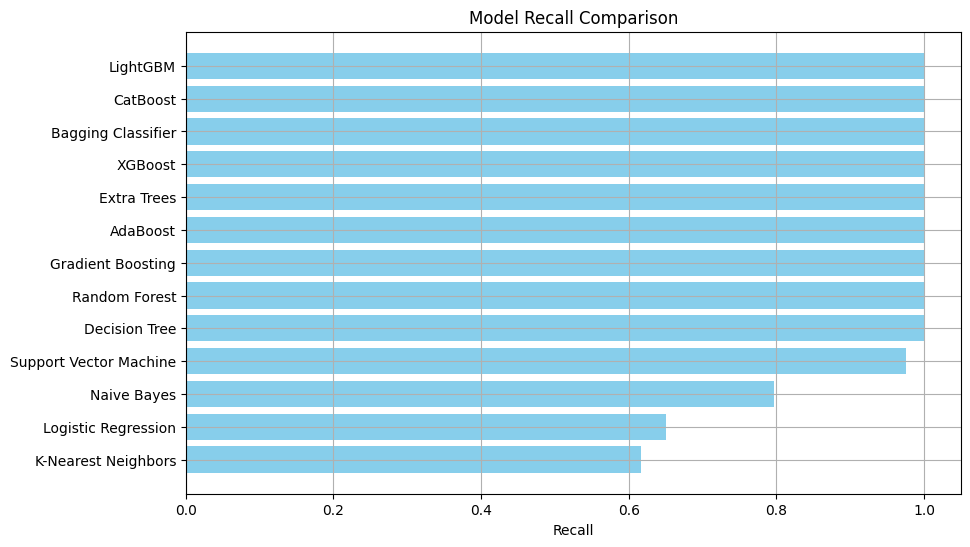

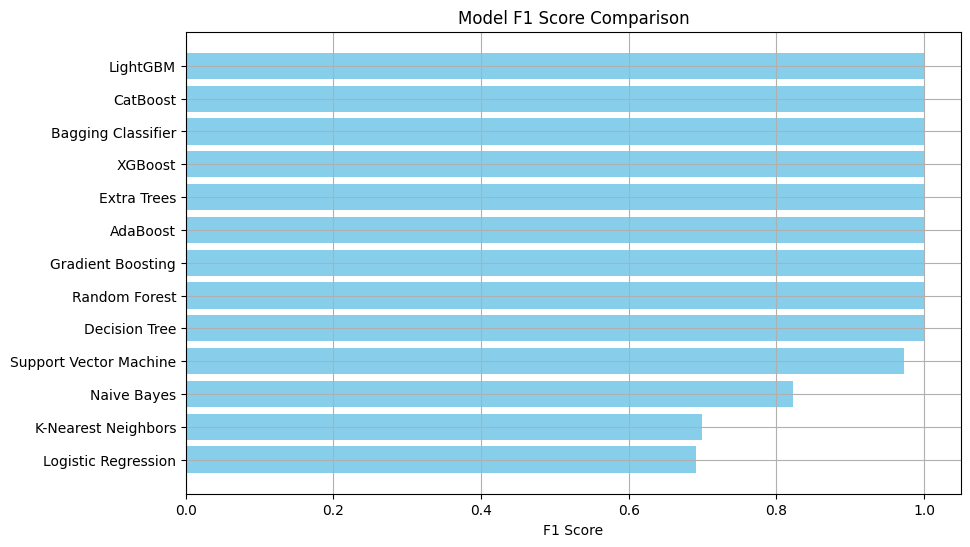

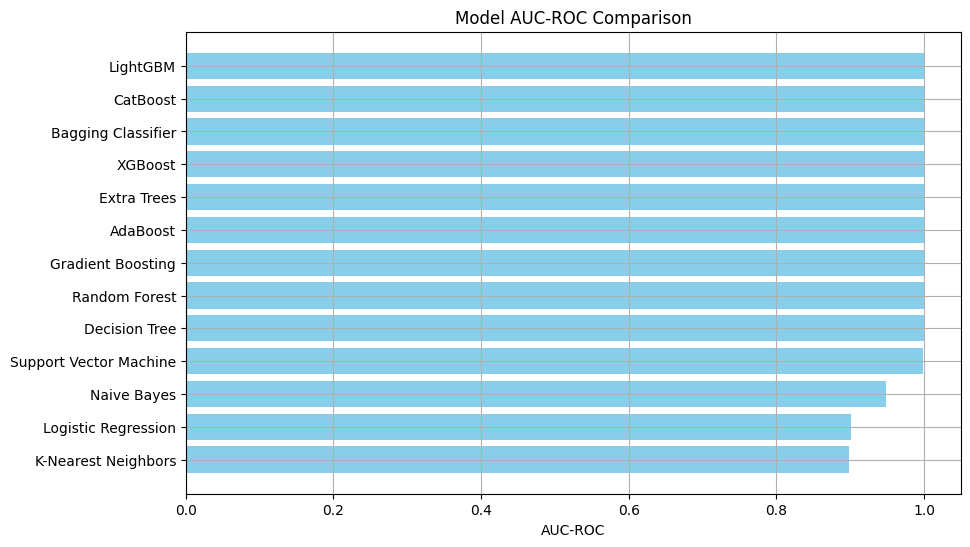

In [104]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    performance_df.sort_values(by=metric, ascending=True, inplace=True)
    plt.barh(performance_df['Model'], performance_df[metric], color='skyblue')
    plt.xlabel(metric)
    plt.title(f'Model {metric} Comparison')
    plt.grid(True)
    plt.show()


In [105]:
perfect_models = performance_df[performance_df['Accuracy'] == 1.0]
equivalent_models = perfect_models['Model'].tolist()

print('\nEquivalent Models with Perfect Accuracy:')
print(equivalent_models)

print('\nConclusion:')
print('Many models achieved perfect accuracy likely due to the dataset being relatively easy to classify or potentially imbalanced. The binary feature "IP_Address_Flag" might be a strong predictor of fraud, contributing to the high model performance.')


Equivalent Models with Perfect Accuracy:
['Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'Extra Trees', 'XGBoost', 'Bagging Classifier', 'CatBoost', 'LightGBM']

Conclusion:
Many models achieved perfect accuracy likely due to the dataset being relatively easy to classify or potentially imbalanced. The binary feature "IP_Address_Flag" might be a strong predictor of fraud, contributing to the high model performance.


In [106]:
# For convenience, let's redo random forest
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
important_features = feature_importances.sort_values(ascending=False).head(10)

print('\nTop 10 Important Features:')
print(important_features)

# Select the top 2 important features for further analysis
top_2_features = important_features.head(2).index.tolist()
print('\nTop 2 Important Features for Fraud Detection:')
print(top_2_features)


Top 10 Important Features:
failed_transaction_count_7d    0.541843
risk_score                     0.402352
transaction_distance           0.007202
account_balance                0.006929
avg_transaction_amount_7d      0.006869
transaction_amount             0.006709
card_age                       0.006108
daily_transaction_count        0.003609
is_weekend                     0.000866
device_type_Laptop             0.000784
dtype: float64

Top 2 Important Features for Fraud Detection:
['failed_transaction_count_7d', 'risk_score']


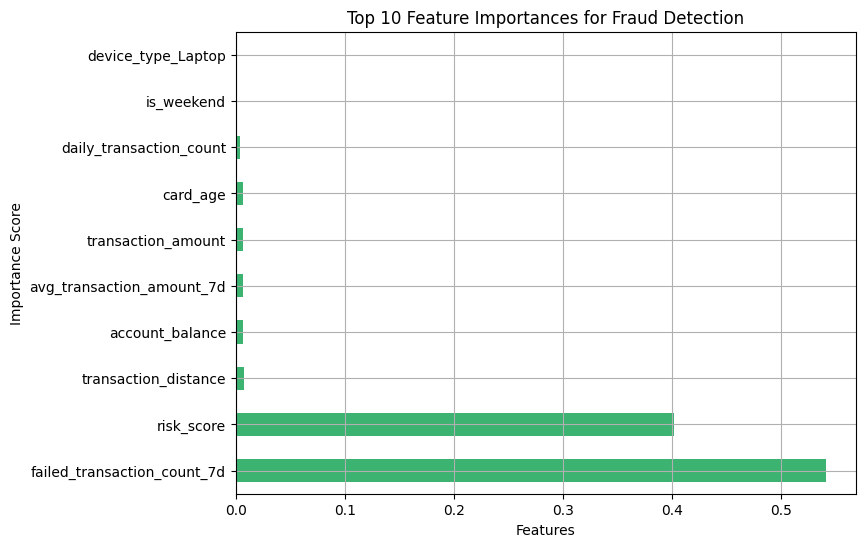

In [107]:
# Visualization of feature importance
plt.figure(figsize=(8, 6))
important_features.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Feature Importances for Fraud Detection')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.grid(True)
plt.show()

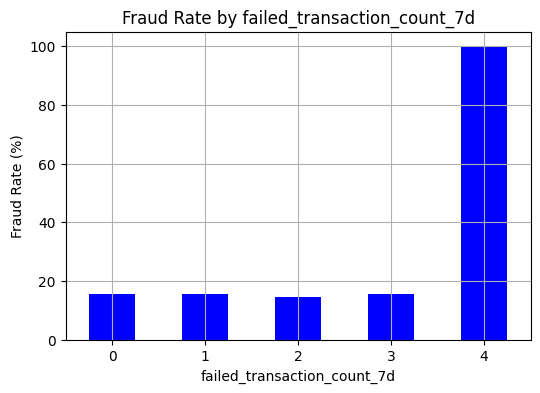

Fraud Rate for failed_transaction_count_7d:
failed_transaction_count_7d
0     15.405735
1     15.458838
2     14.500051
3     15.707744
4    100.000000
Name: fraud_label, dtype: float64


<ipython-input-108-c74ae155fc7c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby('risk_score_binned')['fraud_label'].mean() * 100


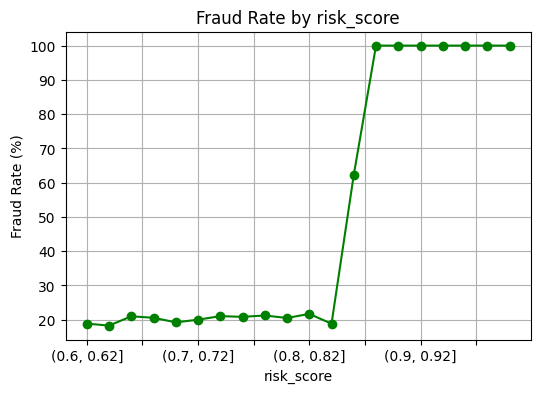

Fraud Rate for risk_score:
risk_score_binned
(0.6, 0.62]      18.814969
(0.62, 0.64]     18.245264
(0.64, 0.66]     20.946626
(0.66, 0.68]     20.527859
(0.68, 0.7]      19.191919
(0.7, 0.72]      19.958203
(0.72, 0.74]     21.010101
(0.74, 0.76]     20.791075
(0.76, 0.78]     21.196222
(0.78, 0.8]      20.459519
(0.8, 0.82]      21.663244
(0.82, 0.84]     18.794688
(0.84, 0.86]     62.244898
(0.86, 0.88]    100.000000
(0.88, 0.9]     100.000000
(0.9, 0.92]     100.000000
(0.92, 0.94]    100.000000
(0.94, 0.96]    100.000000
(0.96, 0.98]    100.000000
(0.98, 1.0]     100.000000
Name: fraud_label, dtype: float64


In [108]:
##examining the two most important factors
for factor in top_2_features:
    plt.figure(figsize=(6, 4))
    if factor == 'risk_score':
        # Use finer bins for Risk_Score and zoom into the range with most variation
        df['risk_score_binned'] = pd.cut(df['risk_score'], bins=np.arange(0.6, 1.01, 0.02))
        fraud_rate = df.groupby('risk_score_binned')['fraud_label'].mean() * 100
        fraud_rate.plot(kind='line', color='green', marker='o')
    else:
        fraud_rate = df.groupby(factor)['fraud_label'].mean() * 100
        fraud_rate.plot(kind='bar', color=['blue'])
    plt.title(f'Fraud Rate by {factor}')
    plt.xlabel(f'{factor}')
    plt.ylabel('Fraud Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=0)
    plt.show()
    print(f'Fraud Rate for {factor}:')
    print(fraud_rate)